Vincenzo Russo <br>
S2336012



<img src ='https://cdn.freebiesupply.com/images/large/2x/pokemon-logo-black-transparent.png' width="400"/>



# <b>ML&DA - Coursework 2 - Pokémon Dataset</b>

In [2]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab integration
import kagglehub
from google.colab import drive

# File handling and system operations
import os
import shutil

# Machine learning related libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.feature_selection import SelectFromModel

# Statistical functions
from scipy.stats import norm

# Image and URL handling
from IPython.display import Image, display
from PIL import Image
from io import BytesIO
import requests

In [3]:
# Flush and umount to make sure drive is mounted fresh at each run all
drive.flush_and_unmount()

# Mount drive, change working directory
drive.mount('/content/drive')

# Assign a path variable to later assign dataset to
root_path = "/content/drive/MyDrive/Education/University/UNI 10 Software Development for Business (University Year 4)/Machine Learning/Coursework 2"
# Make root_path the root path
os.chdir(root_path)

# View current working directory
%ls

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
'~$&DA CW 2024-25A V Russo.docx'  'ML&DA CW 2024-25A V Russo.ipynb'   Resources/
 data/                            'ML&DA CW 2024-25A V Russo.pdf'
'ML&DA CW 2024-25A V Russo.docx'   pokemon_dataset_cleaned.csv


## <b>Reading Data from Kaggle</b>
<p> First, reading the dataset from Kaggle, a popular machine learning and data analysis website where users post datasets and their own findings of said datasets.</p>

In [4]:
# Define paths
data_path = os.path.join(root_path, 'data')
file_name = 'pokemon_dataset.csv'
file_path = os.path.join(data_path, file_name) # Ultimate path final

# Ensure the data folder exists
os.makedirs(data_path, exist_ok=True)

# Check if the file exists or download it
if not os.path.isfile(file_path):
    path = kagglehub.dataset_download("ceebloop/pokmon-dataset-2024")
    shutil.move(os.path.join(path, file_name), file_path)
    print("File downloaded and moved successfully.")
else:
    print("File already exists.")

# Load the DataFrame
df = pd.read_csv(file_path)

File already exists.


## <b>Pre-processing</b>

### Understanding Data Types

To better understand the data itself, it's good to look at certain factors:

In [5]:
# Initial view into datatypes of dataset
df.info(memory_usage= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dex_number      1025 non-null   object
 1   name            1025 non-null   object
 2   type_01         1025 non-null   object
 3   type_02         526 non-null    object
 4   ability_01      1025 non-null   object
 5   ability_02      530 non-null    object
 6   hidden_ability  856 non-null    object
 7   egg_group_01    905 non-null    object
 8   egg_group_02    280 non-null    object
 9   is_legendary    1025 non-null   bool  
 10  bio             1025 non-null   object
 11  hp              1025 non-null   int64 
 12  attack          1025 non-null   int64 
 13  defense         1025 non-null   int64 
 14  sp_attack       1025 non-null   int64 
 15  sp_defense      1025 non-null   int64 
 16  speed           1025 non-null   int64 
dtypes: bool(1), int64(6), object(10)

There are 1025 rows, 17 columns.

### Inspecting Data

In [6]:
df.head(5)

,dex_number,name,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bio,hp,attack,defense,sp_attack,sp_defense,speed
0,#0001,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Bulbasaur is a dual-type Grass/Poison Pokémon ...,45,49,49,65,65,45
1,#0002,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Ivysaur is a dual-type Grass/Poison Pokémon in...,60,62,63,80,80,60
2,#0003,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,False,Venusaur is a dual-type Grass/Poison Pokémon i...,80,82,83,100,100,80
3,#0004,Charmander,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,False,Charmander is a Fire-type Pokémon introduced i...,39,52,43,60,50,65
4,#0005,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,False,Charmeleon is a Fire-type Pokémon introduced i...,58,64,58,80,65,80


In [7]:
# Get rid of the # in dexnum for later purposes when showing off silcoon casoon
df['dex_number'] = df['dex_number'].str.replace('#', '', regex=False)

#### Summary Statistics

In [8]:
# Summary statistics on numerical cols
df.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,70.072195,77.380488,72.395122,69.959024,70.088780,67.127805
std,26.665218,29.723557,29.364210,29.637133,26.668189,28.654567
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000
50%,67.000000,75.000000,70.000000,65.000000,65.000000,65.000000
75%,85.000000,100.000000,90.000000,90.000000,85.000000,88.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000


#### Check for Class Imbalance

In [9]:
# Check for classification count in target column
df['is_legendary'].value_counts()

,count
is_legendary,
False,954
True,71


Target classification is heavily unbalanced. We can address this later.

#### Visualising Stat Differences

#### Feature Adding

BST will most definitely play a role in predicting legendary

In [10]:
# Define columns for stats that contribute to bst
stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Calculate the bst
df['bst'] = df[stat_columns].sum(axis=1)

# Verify that the bst has been added
print(df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'bst']].head())

   hp  attack  defense  sp_attack  sp_defense  speed  bst
0  45      49       49         65          65     45  318
1  60      62       63         80          80     60  405
2  80      82       83        100         100     80  525
3  39      52       43         60          50     65  309
4  58      64       58         80          65     80  405


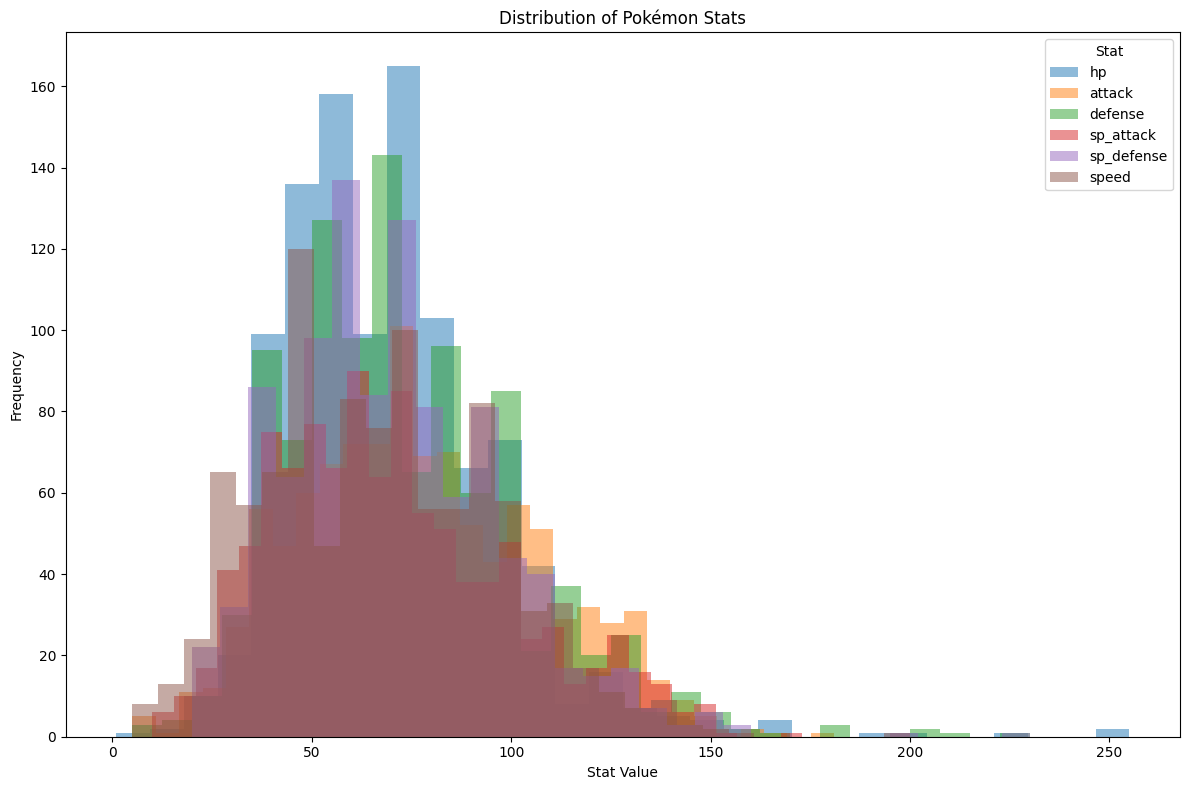

In [11]:
# List of stats to plot
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Plot histograms for each stat
plt.figure(figsize=(12, 8))
for stat in stats:
    plt.hist(df[stat], bins=30, alpha=0.5, label=stat)

# Customise and show the plot
plt.title('Distribution of Pokémon Stats')
plt.xlabel('Stat Value')
plt.ylabel('Frequency')
plt.legend(title='Stat', loc='upper right')
plt.tight_layout()
plt.show()

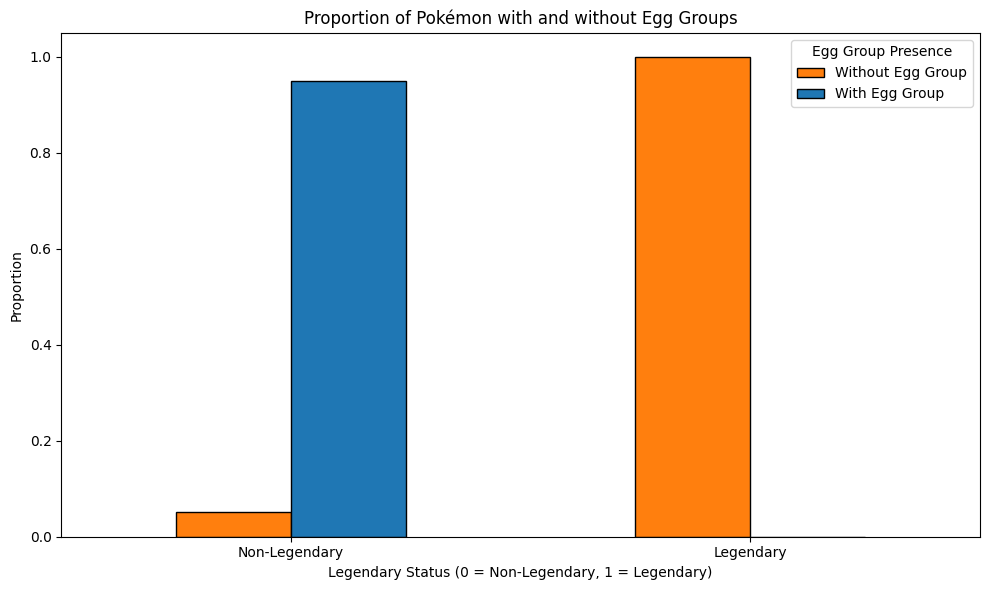

In [12]:
# Calculate counts of pokemn with and without egg groups
has_egg_group = df['egg_group_01'].notnull()
egg_group_stats = pd.crosstab(df['is_legendary'], has_egg_group, normalize='index')

# Create bar plot
egg_group_stats.plot(kind='bar', figsize=(10, 6), color=['#ff7f0e', '#1f77b4'], edgecolor='black')
plt.title('Proportion of Pokémon with and without Egg Groups')
plt.xlabel('Legendary Status (0 = Non-Legendary, 1 = Legendary)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'], rotation=0)
plt.legend(['Without Egg Group', 'With Egg Group'], title='Egg Group Presence')
plt.tight_layout()
plt.show()

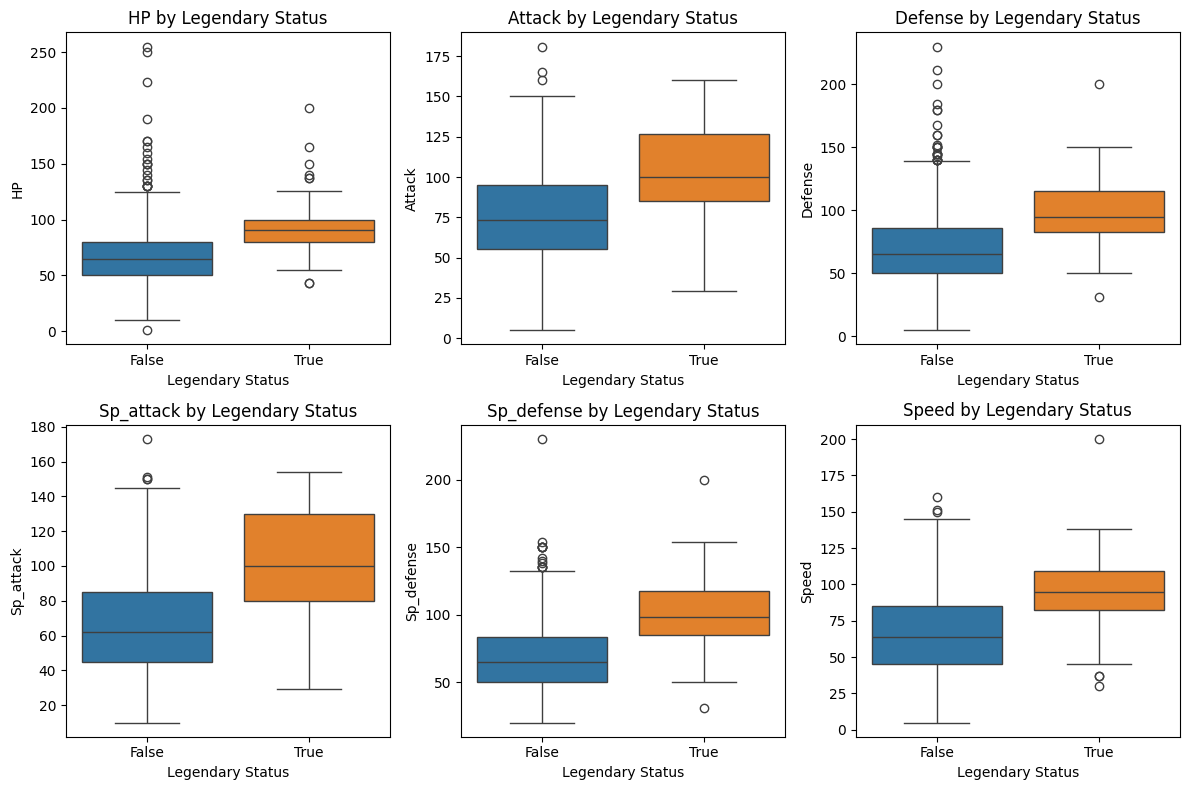

In [13]:
# List of stats to plot
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Plot boxplots for each stat by legendary col
plt.figure(figsize=(12, 8))
for i in range(len(stats)):
    stat = stats[i]
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='is_legendary', y=stat, data=df, hue='is_legendary',  palette=['#1f77b4', '#ff7f0e'], legend=False)
    plt.xlabel('Legendary Status')

    # Conditional statements to capitalise/upper for HP stat
    if len(stat) == 2:
        plt.title(f'{stat.upper()} by Legendary Status')
        plt.ylabel(stat.upper())
    else:
        plt.title(f'{stat.capitalize()} by Legendary Status')
        plt.ylabel(stat.capitalize())

# Show
plt.tight_layout()
plt.show()

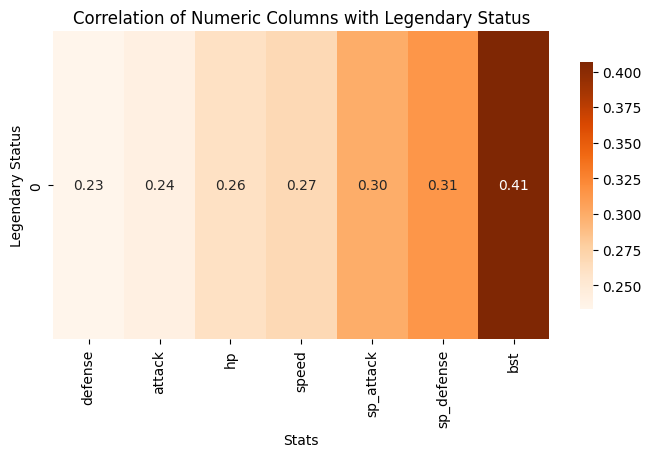

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix between the numeric columns and legenadry
correlation_matrix = numeric_df.corrwith(df['is_legendary'])

# Create a DataFrame for better visualisation
correlation_df = correlation_matrix.sort_values(ascending=True).to_frame()

# Initialise heatmap visualisation
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_df.T, annot=True, cmap='Oranges', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation of Numeric Columns with Legendary Status')
plt.xlabel('Stats')
plt.ylabel('Legendary Status')
plt.show()

### Cleaning Dataset

We need columns that are valuable in predicting legendary status.

In [15]:
df['is_legendary'] = df['is_legendary'].astype(int)
df.head(5)

,dex_number,name,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bio,hp,attack,defense,sp_attack,sp_defense,speed,bst
0,0001,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,Bulbasaur is a dual-type Grass/Poison Pokémon ...,45,49,49,65,65,45,318
1,0002,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,Ivysaur is a dual-type Grass/Poison Pokémon in...,60,62,63,80,80,60,405
2,0003,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,Venusaur is a dual-type Grass/Poison Pokémon i...,80,82,83,100,100,80,525
3,0004,Charmander,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,0,Charmander is a Fire-type Pokémon introduced i...,39,52,43,60,50,65,309
4,0005,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,0,Charmeleon is a Fire-type Pokémon introduced i...,58,64,58,80,65,80,405


In [16]:
# Get the dataframe before dropping anything for reflection later in tuning
df_before_drop = df.copy()

# Create a new df of columns to drop
columns_to_drop = ['dex_number','name', 'bio', 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', "speed"]

# Conditional assignation to new variable only if theyre not in the df already drop them
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=False)

df.head(10)

,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bst
0,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,318
1,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,405
2,Grass,Poison,Overgrow,NaN,Chlorophyll,Monster,Grass,0,525
3,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,0,309
4,Fire,NaN,Blaze,NaN,Solar Power,Monster,Dragon,0,405
5,Fire,Flying,Blaze,NaN,Solar Power,Monster,Dragon,0,534
6,Water,NaN,Torrent,NaN,Rain Dish,Monster,Water 1,0,314
7,Water,NaN,Torrent,NaN,Rain Dish,Monster,Water 1,0,405
8,Water,NaN,Torrent,NaN,Rain Dish,Monster,Water 1,0,530
9,Bug,NaN,Shield,NaN,Run Away,Bug,NaN,0,195


#### Check for Values of 0

In [17]:
# Check for counts of 0
zero_counts = (df == 0).sum()
print(zero_counts)

type_01             0
type_02             0
ability_01          0
ability_02          0
hidden_ability      0
egg_group_01        0
egg_group_02        0
is_legendary      954
bst                 0
dtype: int64


No 0 values other than target column; this is good. No further action needed for now.

#### Check for Null Values

In [18]:
# Check for null values
print(df.isnull().sum())

type_01             0
type_02           499
ability_01          0
ability_02        495
hidden_ability    169
egg_group_01      120
egg_group_02      745
is_legendary        0
bst                 0
dtype: int64


A few columns have null values, therefore we need to decide how to deal with them. All are categorical (objects).

Some Pokémon don't have two types, two abilities, hidden ability or egg groups. We can fill them with placeholder values, as the columns are still useful.

No more null values, we can proceed.

In [19]:
 # View cascoon silcoon stats
df_cascoon_silcoon = df_before_drop[(df_before_drop['name'] == 'Cascoon') | (df_before_drop['name'] == 'Silcoon')]
df_cascoon_silcoon.head()

,dex_number,name,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bio,hp,attack,defense,sp_attack,sp_defense,speed,bst
265,0266,Silcoon,Bug,NaN,Shed,NaN,NaN,Bug,NaN,0,Silcoon is a Bug-type Pokémon introduced in Ge...,50,35,55,25,25,15,205
267,0268,Cascoon,Bug,NaN,Shed,NaN,NaN,Bug,NaN,0,Cascoon is a Bug-type Pokémon introduced in Ge...,50,35,55,25,25,15,205


These Pokémon have identical stats, abilities, egg groups and aren't legendary; aren't useful in the dataset, but wouldn't make a big difference. We can remove them for simplicity and slightly improve model efficiency later.

In [20]:
# Check for null
df[['type_02', 'ability_02', 'hidden_ability', 'egg_group_01', 'egg_group_02']] = df[['type_02', 'ability_02', 'hidden_ability', 'egg_group_01', 'egg_group_02']].fillna('Unknown')
print(df.isnull().sum())

type_01           0
type_02           0
ability_01        0
ability_02        0
hidden_ability    0
egg_group_01      0
egg_group_02      0
is_legendary      0
bst               0
dtype: int64


#### Handling Outliers

Most likely not an issue; legendary Pokémon have higher stats, so will most likely be outliers.

In all instances stats are higher if legendary, with fewer outliers than non legendary. Doesn't make sense to remove outliers in this context.

#### Save dataset

In [23]:
# New cleaned dataset
df.to_csv('pokemon_dataset_cleaned.csv', index=False)

# Read cleaned dataset
df = pd.read_csv('pokemon_dataset_cleaned.csv')

# Print head to make sure it worked
df.head(10)

,type_01,type_02,ability_01,ability_02,hidden_ability,egg_group_01,egg_group_02,is_legendary,bst
0,Grass,Poison,Overgrow,Unknown,Chlorophyll,Monster,Grass,0,318
1,Grass,Poison,Overgrow,Unknown,Chlorophyll,Monster,Grass,0,405
2,Grass,Poison,Overgrow,Unknown,Chlorophyll,Monster,Grass,0,525
3,Fire,Unknown,Blaze,Unknown,Solar Power,Monster,Dragon,0,309
4,Fire,Unknown,Blaze,Unknown,Solar Power,Monster,Dragon,0,405
5,Fire,Flying,Blaze,Unknown,Solar Power,Monster,Dragon,0,534
6,Water,Unknown,Torrent,Unknown,Rain Dish,Monster,Water 1,0,314
7,Water,Unknown,Torrent,Unknown,Rain Dish,Monster,Water 1,0,405
8,Water,Unknown,Torrent,Unknown,Rain Dish,Monster,Water 1,0,530
9,Bug,Unknown,Shield,Unknown,Run Away,Bug,Unknown,0,195


## Creating Random Forest Model


In [21]:
# Initialise train-test-val split
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Initial train-test-val split (70% training, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the split data
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (717, 8), Validation shape: (154, 8), Test shape: (154, 8)


In [22]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialise and fit the encoder on training data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])

# Transform validation and test data
X_val[categorical_cols] = encoder.transform(X_val[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# Display results
print("\nEncoded Training Data Sample:")
print(X_train.head())

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Encoded Training Data Sample:
      type_01  type_02  ability_01  ability_02  hidden_ability  egg_group_01  \
1020      3.0      2.0       104.0       117.0           145.0          14.0   
479      14.0     18.0        73.0       117.0           145.0          14.0   
227       1.0      6.0        33.0        24.0           146.0           5.0   
910       6.0      8.0        12.0       117.0           143.0           5.0   
362      11.0     17.0       156.0        35.0            77.0          15.0   

      egg_group_02  bst  
1020          16.0  590  
479           16.0  580  
227           16.0  330  
910           16.0  530  
362            6.0  290  
Train shape: (717, 8), Validation shape: (154, 8), Test shape: (154, 8)


In [24]:
# Initialise random forest model without balancing class weights yet
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

# Predict on validation set and print classification report
y_val_pred = rf_base.predict(X_val)
print("Base Model - Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Base Model - Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.88      0.94      0.91        16

    accuracy                           0.98       154
   macro avg       0.94      0.96      0.95       154
weighted avg       0.98      0.98      0.98       154



In [25]:
# Define updated parameter grid to focus on the minority class
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 200, 300],
    'class_weight': ['balanced', {0: 1, 1: 10}],  # Emphasise legendary class
}

# Set up cross validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=44)

# Perform grid search with updated hyperparameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=50),
    param_grid=param_grid,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

# Fit using training data with grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'class_weight': {0: 1, 1: 10}, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


### Evaluate Model

In [26]:
# Cross validation to verify model generalisation against overall data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring='f1')

# Print F1 scores for each fold and their mean
print(f"F1 Scores for each fold: {f1_scores}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Standard Deviation of F1 Scores: {np.std(f1_scores)}")

F1 Scores for each fold: [0.88888889 0.66666667 0.76190476 0.58333333 0.81818182]
Mean F1 Score: 0.7437950937950938
Standard Deviation of F1 Scores: 0.1082684857754476


In [27]:
# Evaluate on validation set
y_val_pred = best_rf.predict(X_val)
print("\n Validation Set Classification Report (Tuned):")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set (final performance check)
y_test_pred = best_rf.predict_proba(X_test)[:, 1]
y_test_pred_adjusted = (y_test_pred >= 0.65).astype(int)
print("\n Test Set Classification Report (Tuned):")
print(classification_report(y_test, y_test_pred_adjusted))


 Validation Set Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       138
           1       0.83      0.94      0.88        16

    accuracy                           0.97       154
   macro avg       0.91      0.96      0.93       154
weighted avg       0.98      0.97      0.97       154


 Test Set Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.83      0.91      0.87        11

    accuracy                           0.98       154
   macro avg       0.91      0.95      0.93       154
weighted avg       0.98      0.98      0.98       154



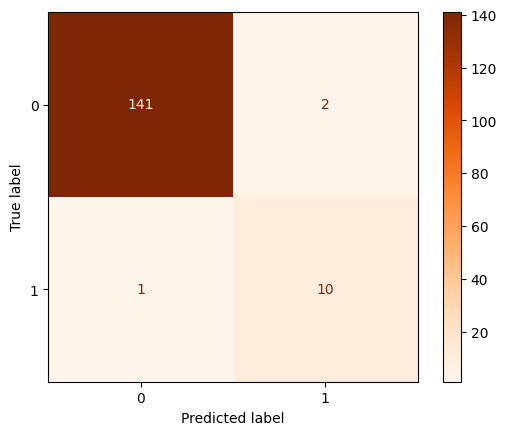

In [28]:
# Use confusion display
cm = confusion_matrix(y_test, y_test_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Oranges')

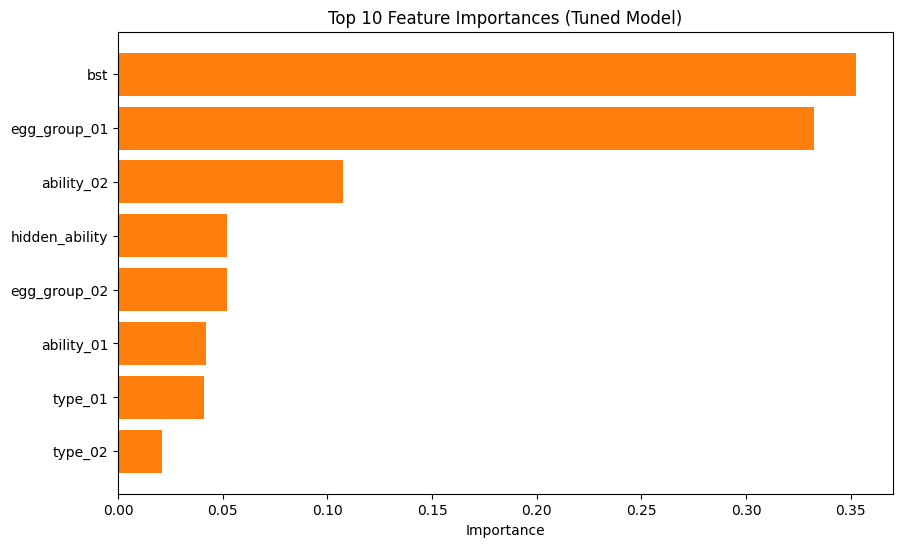

In [29]:
# Get the feature importances
importances = best_rf.feature_importances_
features = X_train.columns

# Sort the indices of features by importance in descending order
sorted_indices = np.argsort(importances)[::-1][:10]

# Plotting the top important features
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importances[sorted_indices], color='#ff7f0e')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Tuned Model)')
plt.gca().invert_yaxis()
plt.show()